<center><h1> Universidade Federal do ABC </h1></center>

<center><h1> Relatório - Relatório n.1 </h1></center>

<center><h3> Nome: Rafael Costa Fernandes </h3></center>
<center><h3>  RA: 21201920754 </h3></center>

# Resumo

Neste relatório serão apresentados os resultados obtidos da primeira aula prática da disciplina de Tópicos Especiais em Processamento de Sinais: Visão Computacional. Serão discutidas e apresentadas técnicas básicas de manipulação de imagem com Python e a biblioteca OpenCV, entre elas a conversão de imagens coloridas para escala de cinzas, soma e subtração de imagens e a obtenção de histogramas.

# Metodologia

Todos os códigos foram escritos para utilização em Python e executados inicialmente na plataforma Raspberry Pi. Uma abordagem de aprendizado rústico foi utilizado, priorizando a utilização mínima de recursos prontos, realizando a maioria das manipulações necessárias via algoritmo próprio. Foi priorizado o plot via biblioteca matplotlib para uma melhor visualização dos resultados na plataforma jupyter notebook.



# Resultados

Abaixo podemos observar os resultados obtidos, seguindo os exercícios dados no roteiro de laboratório, para mais detalhes dos algoritmos, consultar os comentários diretamente nos códigos.

## Exercício 1

A manipulação de uma região de interesse (ROI) é uma operação relativamente simples, necessitando apenas conhecimento de recorte, manipulação e escrita de matrizes em python. 

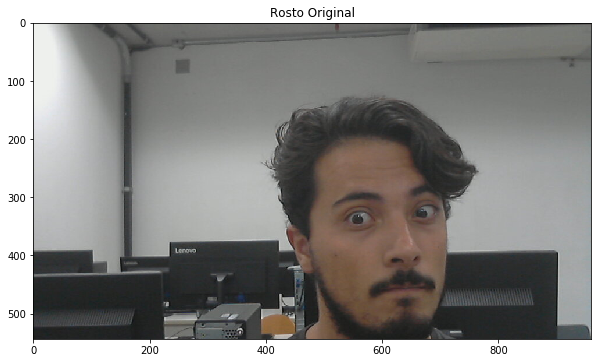

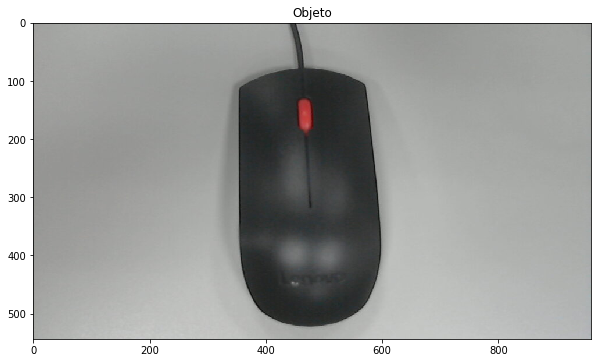

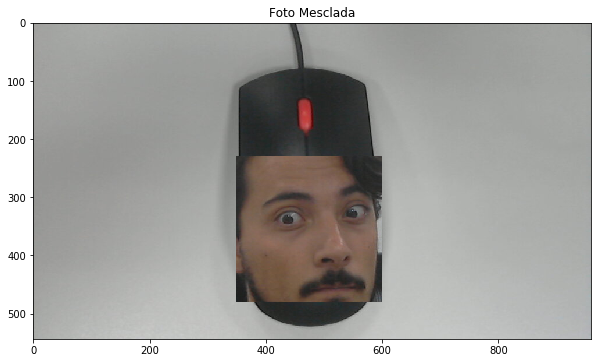

Foto Salva em fotos_ex/mistura_ROI.jpg


In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
Exercício n.1
Importa a duas fotos tiradas no experimento anterior
Seleciona o ROI da foto do rosto e aplica em uma posicao escolhida no objeto
Salva a imagem final
"""



img = cv2.cvtColor(cv2.imread('fotos_ex/rosto.jpg'),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Rosto Original')
plt.show()

obj = cv2.cvtColor(cv2.imread('fotos_ex/objeto.jpg'),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(obj)
plt.title('Objeto')
plt.show()

#escolha de retirada do ROI
in_h = 470
in_v = 230
fim_h = 470+250
fim_v = 230+250
ROI = img[in_v:fim_v, in_h:fim_h]

#colocação do ROI na posição
obj[in_v:fim_v, in_h-120:fim_h-120]= ROI

plt.figure(figsize=(10,10))
plt.imshow(obj)
plt.title('Foto Mesclada')
plt.show()
cv2.imwrite('fotos_ex/mistura_ROI.jpg',cv2.cvtColor(obj, cv2.COLOR_RGB2BGR))
print('Foto Salva em fotos_ex/mistura_ROI.jpg')

## Exercício 2

Neste código fica aparente que a escrita canal a canal, pixel a pixel de uma imagem é um processo que tem uma consideravel demanda computacional, por conta da quantidade de operações simples. Este processo é facilmente realizado em paralelo (pela plataforma própria do OpenCV), visto que cada pixel da matriz é uma variável independente.

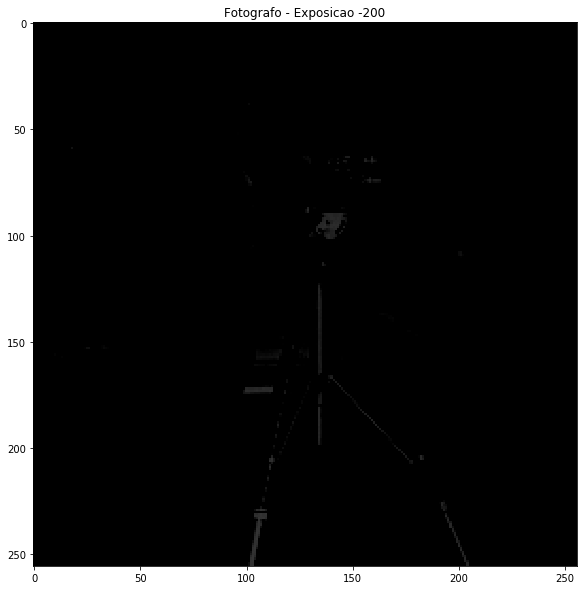

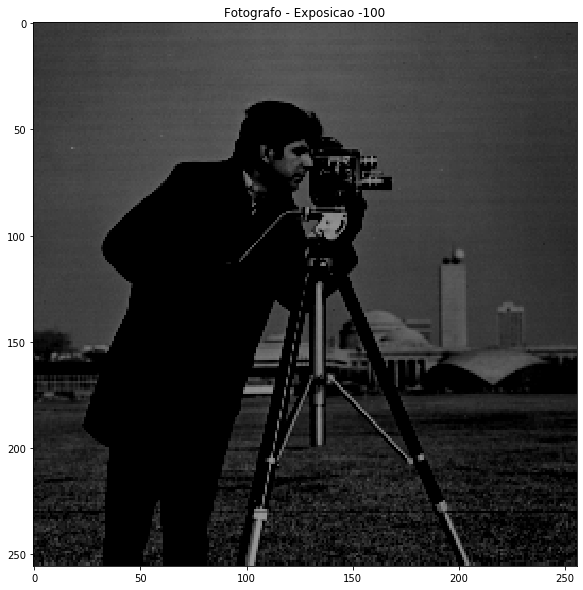

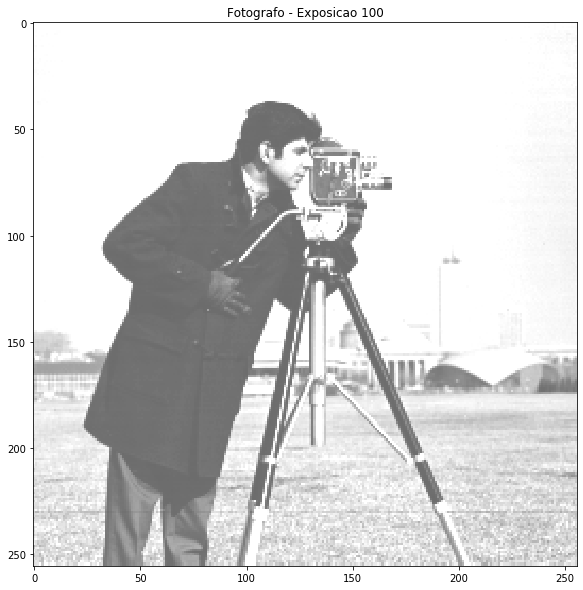

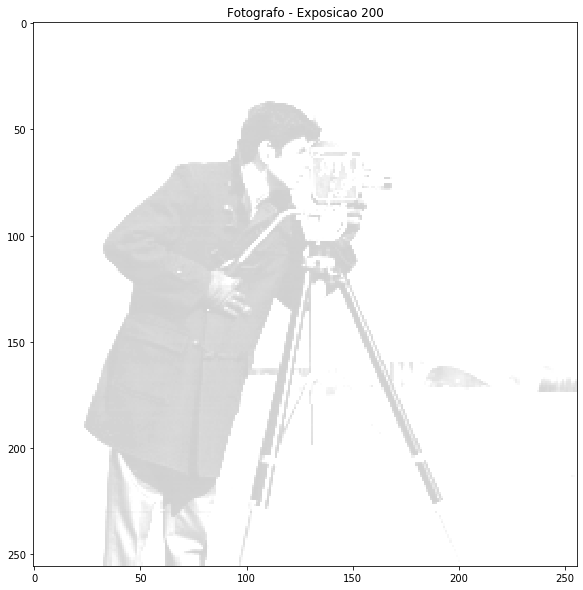

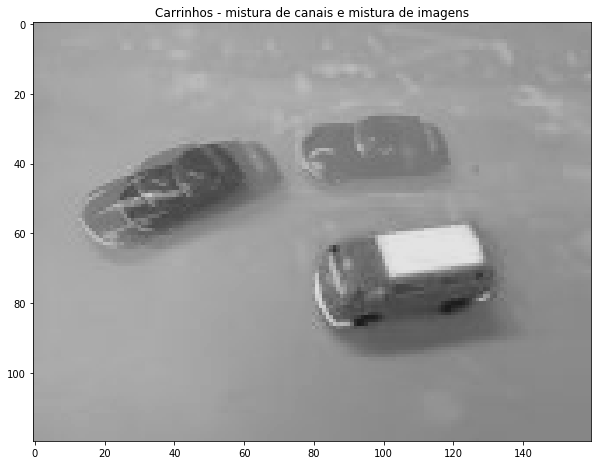

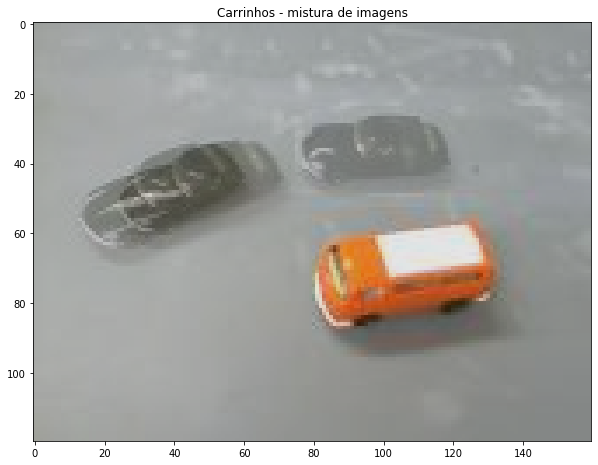

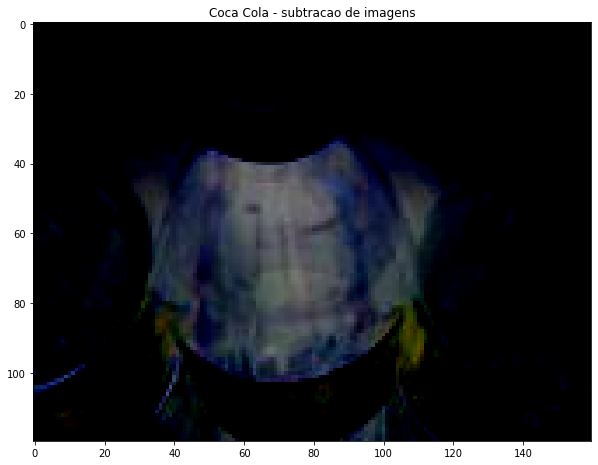

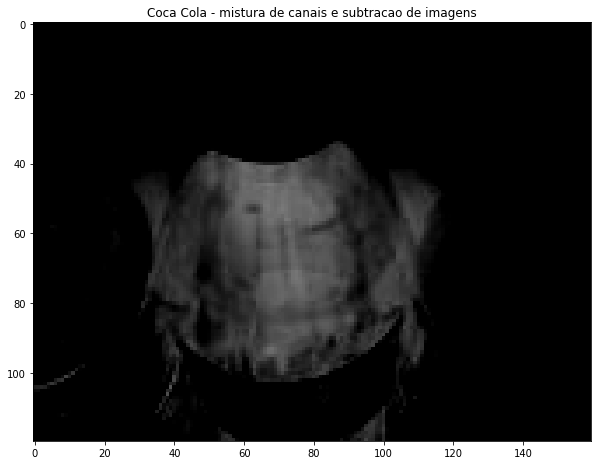

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
    Exercício n.2 
    Fazendo as imagens demonstradas em aula
    Descrição no passo a passo do algoritmo
"""


#Aumenta exposicao da foto cameramam em um valor constante

img_camera = cv2.imread('arquivos_auxiliares/cameraman.tif')
img_camera = cv2.cvtColor(img_camera, cv2.COLOR_BGR2GRAY)
(largura,altura) = img_camera.shape[:2]

ctes = [-200,-100,100,200]

for cte in ctes:
    for ii in range(largura):
        for jj in range(altura): #faz a soma pixel a pixel, com um teste de overflow (para evitar overflow no teste, dividido por 2)
                if img_camera[ii,jj]/2 + cte/2>255/2: 
                    img_camera[ii,jj] = 255
                elif img_camera[ii,jj]/2+127+cte/2<127:
                    img_camera[ii,jj] = 0
                else:
                    img_camera[ii,jj] = img_camera[ii,jj] + cte
    plt.figure(figsize=(10,10)) 
    plt.imshow(img_camera, cmap='gray', vmin=0, vmax=255)
    str = ("Fotografo - Exposicao %i" %(cte))
    plt.title(str)
    plt.show()
    img_camera = cv2.imread('arquivos_auxiliares/cameraman.tif')
    img_camera = cv2.cvtColor(img_camera, cv2.COLOR_BGR2GRAY)


#Soma ponderada das imagens dos carrinhos em escala de cinza 8 bits

img4 = cv2.imread('arquivos_auxiliares/toycars1.png')
img5 = cv2.imread('arquivos_auxiliares/toycars2.png')
img6 = cv2.imread('arquivos_auxiliares/toycars3.png')

a = 0.2989
b = 0.5870
c = 0.1140
cte = 0.3

img4_c = np.uint8(a*img4[:,:,0] + b*img4[:,:,1] + c*img4[:,:,2])
img5_c = np.uint8(a*img5[:,:,0] + b*img5[:,:,1] + c*img5[:,:,2])
img6_c = np.uint8(a*img6[:,:,0] + b*img6[:,:,1] + c*img6[:,:,2])
imgp_c = img4_c

(largura,altura) = img4_c.shape[:2]
for ii in range(largura):
    for jj in range(altura):
        #faz a soma pixel a pixel, com um teste de overflow (para evitar overflow no teste, dividido por 3)    
        if cte*img4_c[ii,jj]/3+cte*img5_c[ii,jj]/3+cte*img6_c[ii,jj]/3>255/3: 
            imgp_c[ii,jj] = cte*img4_c[ii,jj]+cte*img5_c[ii,jj]+cte*img6_c[ii,jj]
        else:
            imgp_c[ii,jj] = cte*img4_c[ii,jj]+cte*img5_c[ii,jj]+cte*img6_c[ii,jj]
plt.figure(figsize=(10,10)) 
plt.imshow(imgp_c, cmap='gray', vmin=0, vmax=255)
plt.title('Carrinhos - mistura de canais e mistura de imagens')
plt.show()

#Soma ponderada das imagens dos carrinhos em BGR 8 bits

imgp_col = img4
(largura,altura) = img4.shape[:2]
for ii in range(largura):
    for jj in range(altura):
        for k in range(3):
            #faz a soma em cada canal de cor, pixel a pixel, com um teste de overflow (para evitar overflow no teste, dividido por 3)
            if cte*img4[ii,jj,k]/3+cte*img5[ii,jj,k]/3+cte*img6[ii,jj,k]/3>255/3:
                imgp_col[ii,jj,k] = cte*img4[ii,jj,k]+cte*img5[ii,jj,k]+cte*img6[ii,jj,k]
            else:
                imgp_col[ii,jj,k] = cte*img4[ii,jj,k]+cte*img5[ii,jj,k]+cte*img6[ii,jj,k]
plt.figure(figsize=(10,10))                
plt.imshow(cv2.cvtColor(imgp_col,cv2.COLOR_BGR2RGB))
plt.title('Carrinhos - mistura de imagens')
plt.show()

#Subtracao das imagens de coca-cola colorida

img7 = cv2.imread('arquivos_auxiliares/cola1.png')
img8 = cv2.imread('arquivos_auxiliares/cola2.png')

(largura,altura) = img7.shape[:2]
img_sub = np.zeros([largura,altura,3], dtype=np.uint8)

for ii in range(largura):
    for jj in range(altura):
        for k in range(3):
            #Faz a subtracao em cada canal de cor, pixel a pixel, para evitar underflow, soma-se 255/2 no teste.
            if img7[ii,jj,k]/2-img8[ii,jj,k]/2+255/2<255/2:
                img_sub[ii,jj,k] = 0
            else:
                img_sub[ii,jj,k] = img7[ii,jj,k]-img8[ii,jj,k]
plt.figure(figsize=(10,10))            
plt.imshow(img_sub)
plt.title('Coca Cola - subtracao de imagens')
plt.show()

#Subtracao das imagens de coca-cola em escala de cinzas

a = 0.2989
b = 0.5870
c = 0.1140

#Soma os canais coloridos da imagem, seguindo os parametros de ponderacao a, b, c.
#Nao ha necessidade de protecao de overflow, visto que a soma a+b+c=0.99.

img7_c = np.uint8(a*img7[:,:,0] + b*img7[:,:,1] + c*img7[:,:,2])
img8_c = np.uint8(a*img8[:,:,0] + b*img8[:,:,1] + c*img8[:,:,2])


(largura,altura) = img7_c.shape[:2]
img_sub_c = np.zeros([largura,altura], dtype=np.uint8)
for ii in range(largura):
    for jj in range(altura):
        if (img7_c[ii,jj]/2-img8_c[ii,jj]/2)+255/2<255/2:
            img_sub_c[ii,jj] = 0
        else:
            img_sub_c[ii,jj] = img7_c[ii,jj]-img8_c[ii,jj]
plt.figure(figsize=(10,10))              
plt.imshow(img_sub_c, cmap='gray', vmin=0, vmax=255)
plt.title('Coca Cola - mistura de canais e subtracao de imagens')
plt.show()

## Exercício 3

Podemos observar que a escolha de um valor de limiar é fundamental para recuperar uma informação correta de uma imagem. Nos resultados abaixo o resultado ótimo é entre 40% e 60%, onde é possível discernir um binário entre os grãos de arroz e o fundo da imagem.

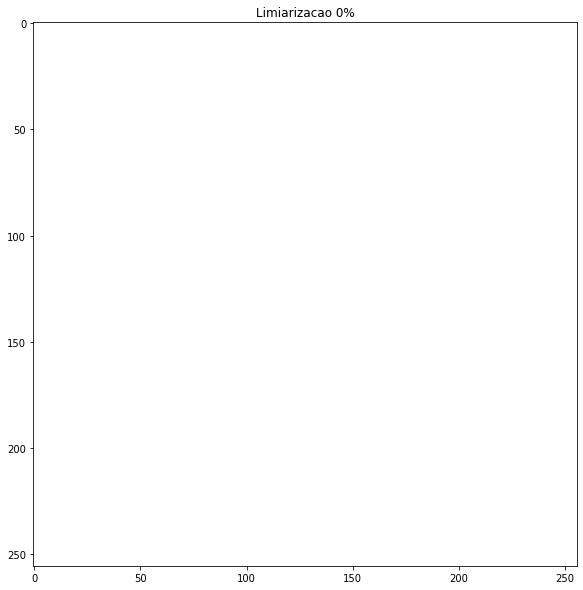

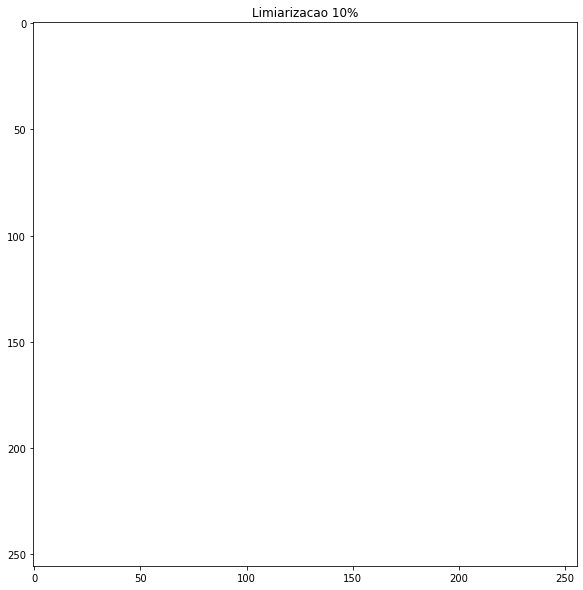

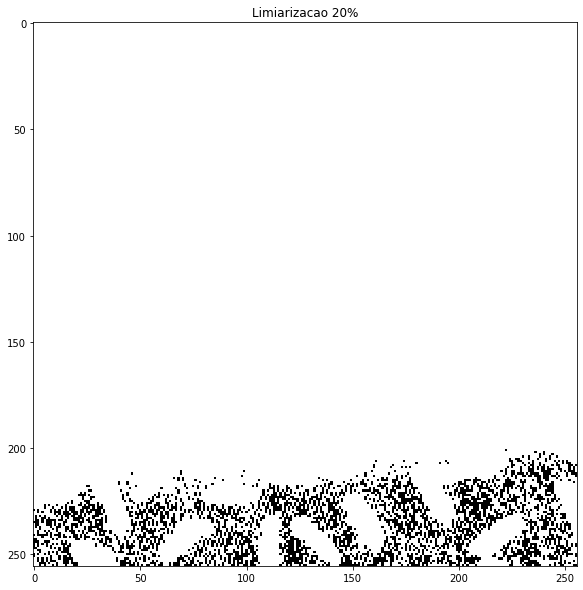

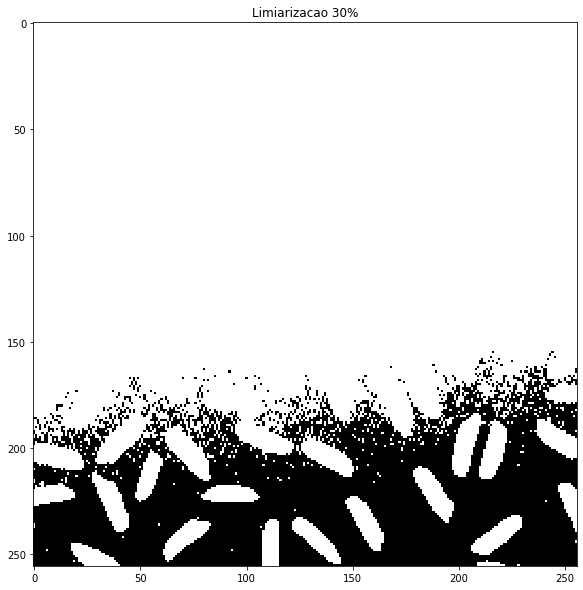

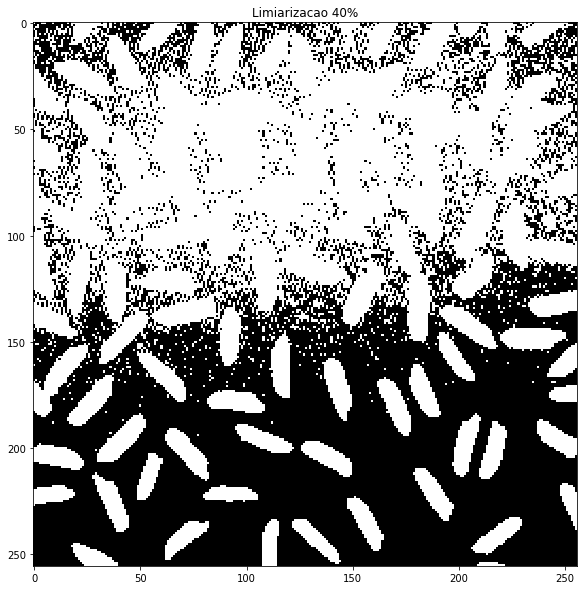

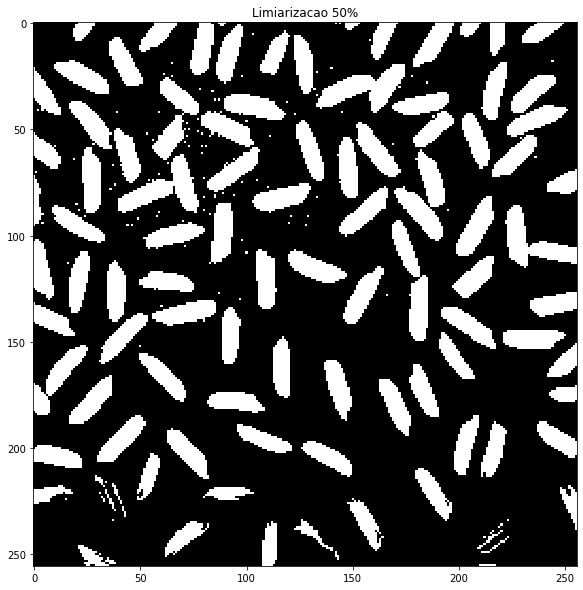

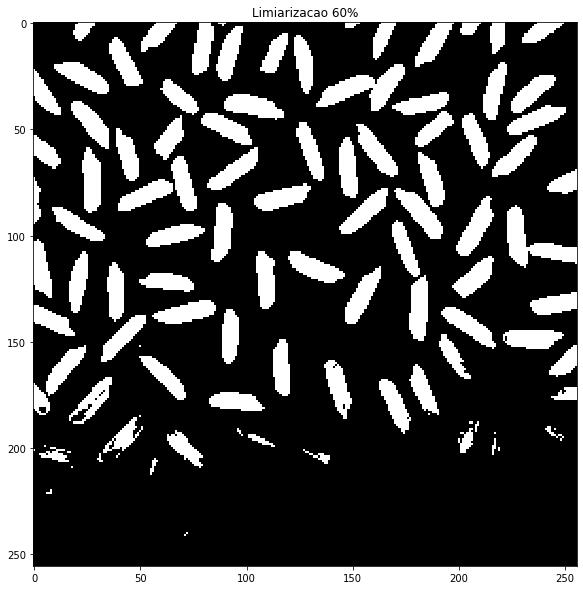

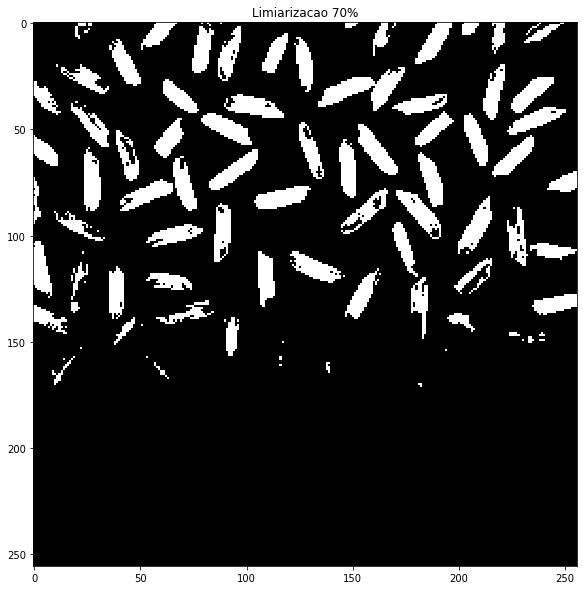

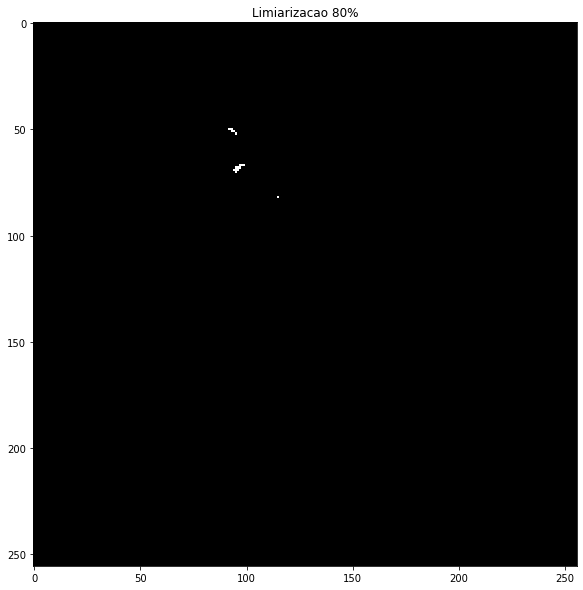

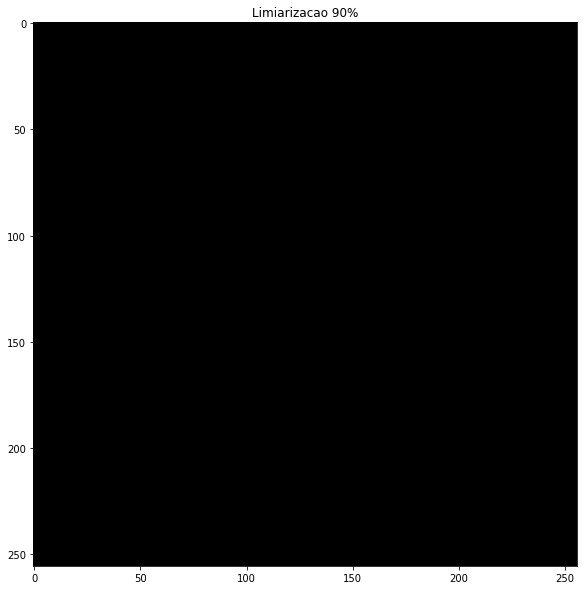

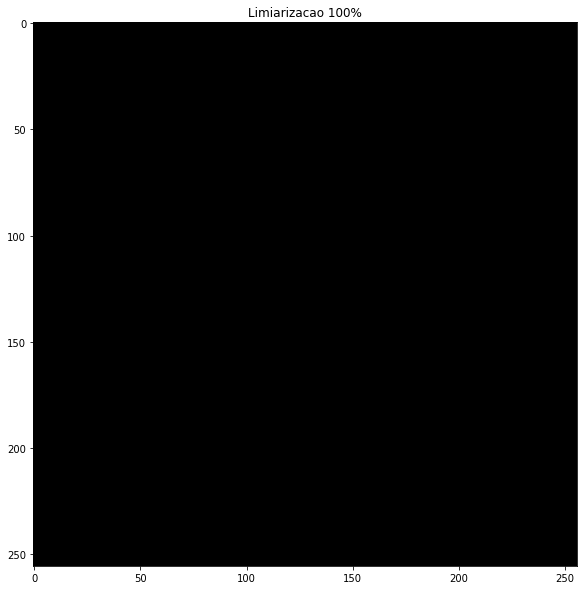

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
Exercício n.3 
    Limiarizacao
    Abre uma foto e realiza dez passos de limiarizacao, de 0 a 100%.
    Operacao pixel a pixel, o openCv trabalha com intensidades 0 para o valor Falso e 255 para o valor True.
"""

img = cv2.imread('arquivos_auxiliares/rice.png')
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lim = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]



(altura,largura) = img.shape[:2]
thr = np.zeros([altura,largura], dtype=np.uint8)

for k in lim:
    for ii in range(largura):
        for jj in range(altura):
            thr_v = k*255
            if img_g[ii,jj] < thr_v:
                thr[ii,jj] = 0
            else:
                thr[ii,jj] = 255
    plt.figure(figsize=(10,10))
    plt.imshow(thr, cmap='gray', vmin=0, vmax=255)
    str = ("Limiarizacao %i%%" % (k*100))
    plt.title(str)
    plt.show()

## Exercício 4

O histograma é uma ferramenta importante para a análise espectral de uma imagem. A partir da visualização do histograma é possível determinar se existe informação "perdida" na imagem, muitos pixels totalmente pretos (valor 0), ou totalmente brancos (valor 255), significam que possivelmente há informação real que não foi transferida para a imagem, geralmente por erro de exposição na fotografia, ou por um cenário de alto contraste. 

Nas figuras abaixo é possível observar que todos os pixels estão em uma área de "cinza", entre os valores 40 e 250, significando que as fotos estão bem expostas e com informações disponíveis.

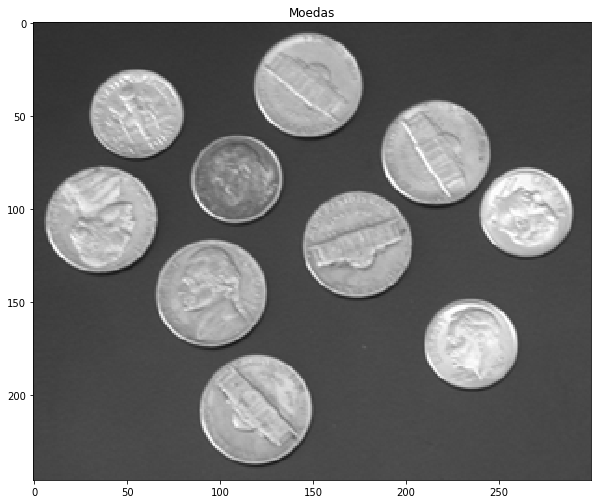

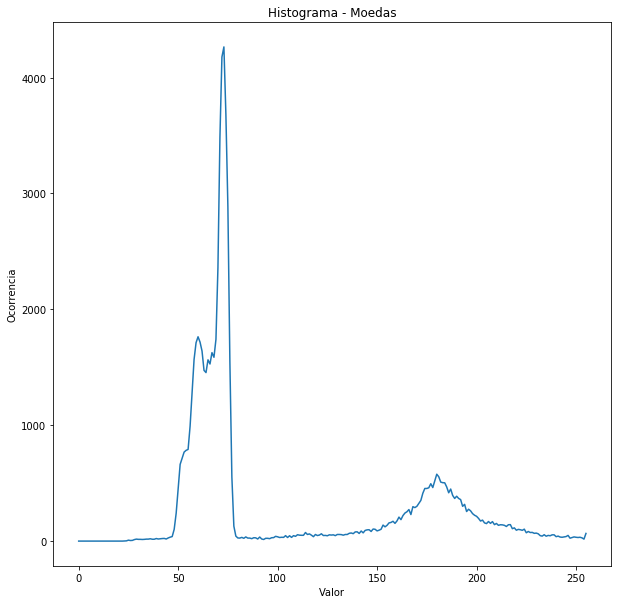

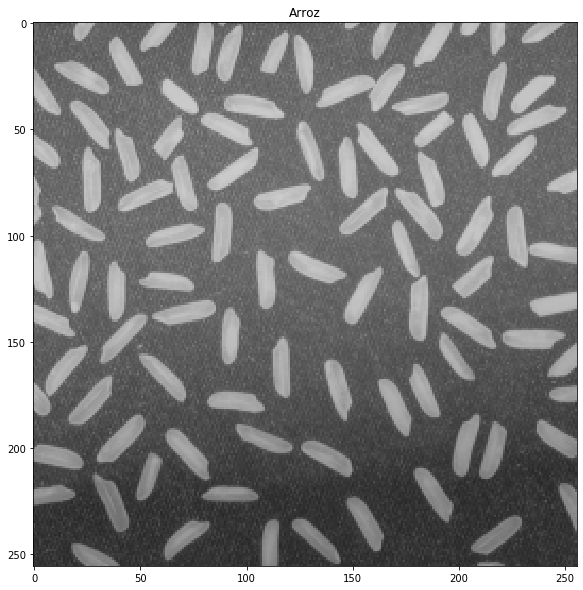

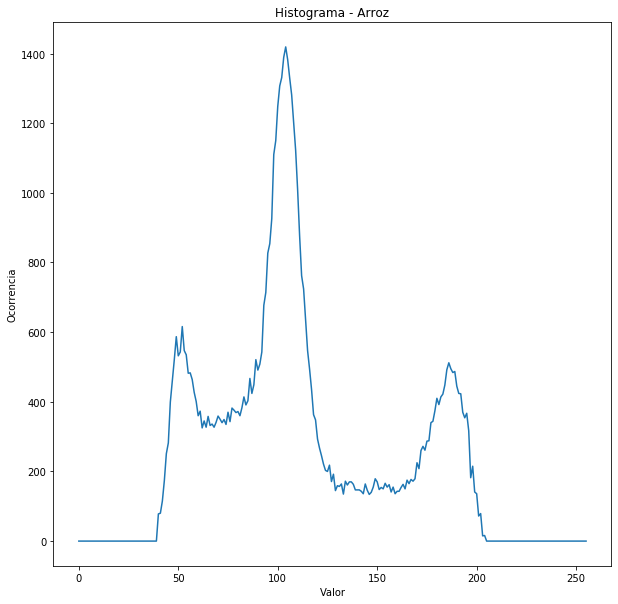

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
Exercício n.4 
    Histograma
    Abre uma foto e calcula o histograma pixel a pixel.
    utiliza a biblioteca matplotlib para expor o histograma em 8 bits.
""" 


img = cv2.imread('arquivos_auxiliares/coins.png')

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Moedas')
plt.show()

(largura, altura) = img.shape[:2]

hist = np.zeros(256)
ind = np.arange(256)

for ii in range(largura):
    for jj in range(altura):
        hist[img[ii,jj]] += 1
plt.figure(figsize=(10,10))
plt.plot(ind,hist)
plt.title('Histograma - Moedas')
plt.xlabel('Valor')
plt.ylabel('Ocorrencia')
plt.show()


img2 = cv2.imread('arquivos_auxiliares/rice.png')
plt.figure(figsize=(10,10))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('Arroz')
plt.show()

(largura, altura) = img2.shape[:2]

hist = np.zeros(256)
ind = np.arange(256)

for ii in range(largura):
    for jj in range(altura):
        hist[img2[ii,jj]] += 1
plt.figure(figsize=(10,10))
plt.plot(ind,hist)
plt.title('Histograma - Arroz')
plt.xlabel('Valor')
plt.ylabel('Ocorrencia')
plt.show()

## Exercício 5

Neste exercício foi realizada uma equalização de histograma, que é uma "melhora" na distribuição de valores de intensidade na imagem, ajustando o contraste e sua exposição. Ainda assim não é possível recuperar informação perdida de pixels completamente brancos ou completamente pretos. 

Também é possível observar uma diferença significativa nas cores da imagem equalizada. O processo de equalização foi feito separadamente em cada canal de cor da imagem (azul, verde e vermelho) e a imagem foi recomposta. Este processo não é o ideal, visto que a cor de um pixel é determinada pela intensidade dos três canais de cor, e como a equalização alterou a intensidade de cada canal de cor de maneiras diferentes, há alteração significativa nas cores, em comparação com a foto original.


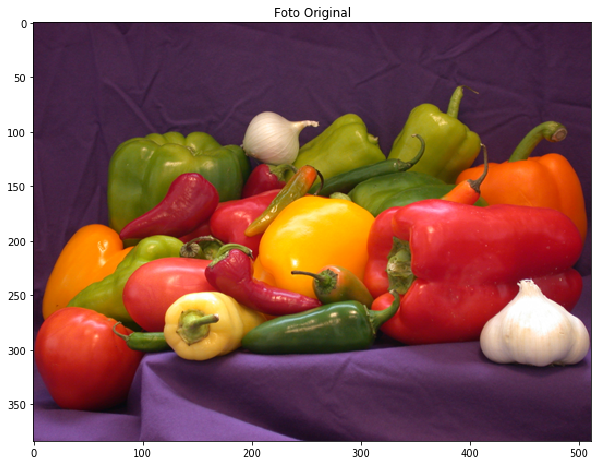

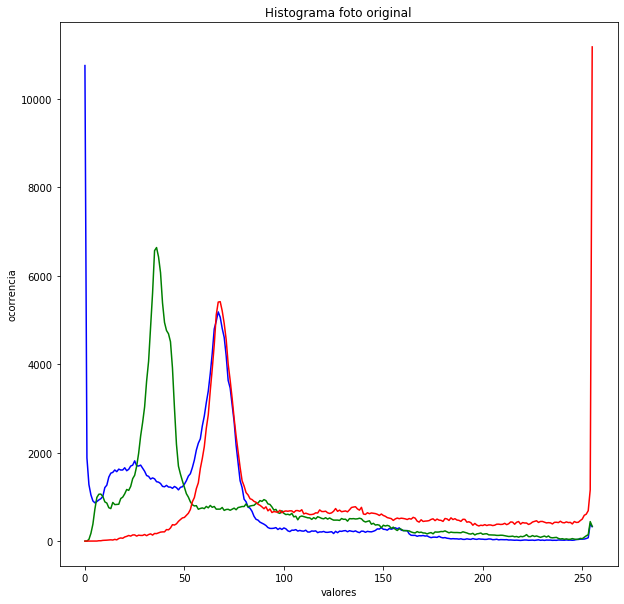

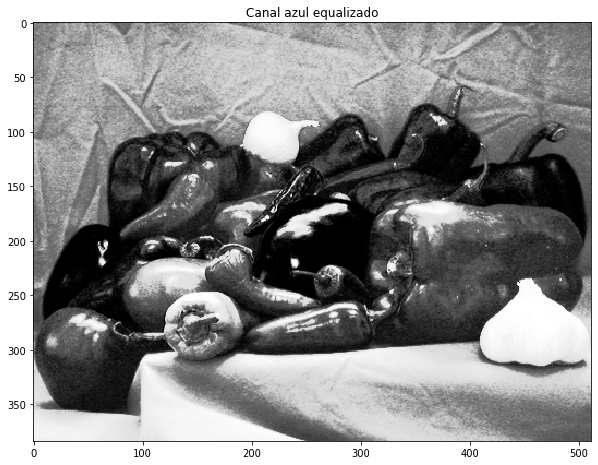

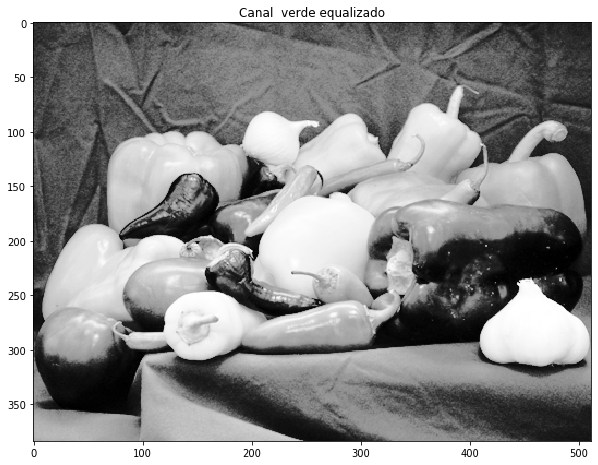

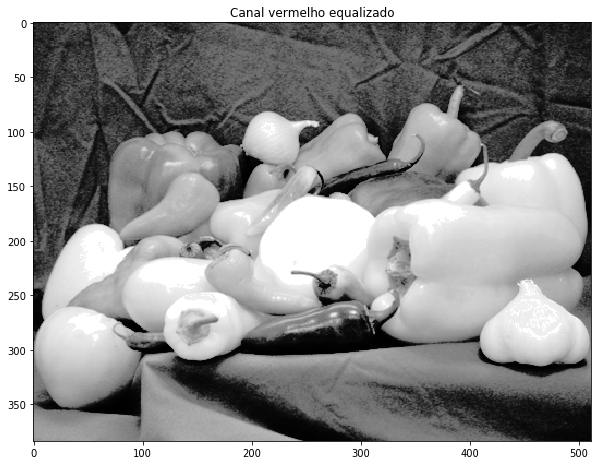

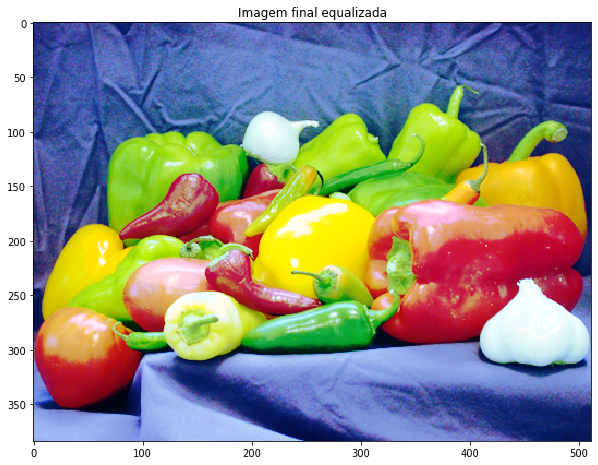

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
Exercício n.5 
    Histograma BGR e equalizacao
    Abre uma foto e calcula o histograma pixel a pixel para cada canal de cor.
    Separa cada canal de cor em uma imagem independente,
    Realiza a equalizacao em cada canal de cor separadamente, depois realoca os canais em uma imagem unica
"""  

img_c = cv2.imread('arquivos_auxiliares/peppers.png')

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))
plt.title("Foto Original")
plt.show()
(largura, altura) = img_c.shape[:2]

hist = np.zeros([256,3])
ind = np.arange(256)

for ii in range(largura):
    for jj in range(altura):
        for k in range(3):
            hist[img_c[ii,jj,k],k] += 1
plt.figure(figsize=(10,10))            
b=plt.plot(ind,hist[:,0],color='b')
g=plt.plot(ind,hist[:,1],color='g')
r=plt.plot(ind,hist[:,2],color='r')
plt.title("Histograma foto original")
plt.xlabel("valores")
plt.ylabel("ocorrencia")
plt.show()

img_c_b = img_c[:,:,0]
img_c_g = img_c[:,:,1]
img_c_r = img_c[:,:,2]

img_eq_b = cv2.equalizeHist(img_c_b)
plt.figure(figsize=(10,10))
plt.imshow(img_eq_b, cmap='gray', vmin=0, vmax=255)
plt.title("Canal azul equalizado")
plt.show()

img_eq_g = cv2.equalizeHist(img_c_g)
plt.figure(figsize=(10,10))
plt.imshow(img_eq_g, cmap='gray', vmin=0, vmax=255)
plt.title("Canal  verde equalizado")
plt.show()

img_eq_r = cv2.equalizeHist(img_c_r)
plt.figure(figsize=(10,10))
plt.imshow(img_eq_r, cmap='gray', vmin=0, vmax=255)
plt.title("Canal vermelho equalizado")
plt.show()

img_eq = np.zeros([largura,altura,3], dtype=np.uint8)
img_eq[:,:,0] = img_eq_b
img_eq[:,:,1] = img_eq_g
img_eq[:,:,2] = img_eq_r

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_eq,cv2.COLOR_BGR2RGB))
plt.title("Imagem final equalizada")
plt.show()

## Exercício 6

A limearização colorida é um processo muito semelhante ao já realizado, apenas separando cada canal de cor em uma imagem distinta. Este tipo de limearização pode ser muito útil para imagens binárias coloridas, sendo possível obter diferentes informações em uma mesma fotografia.

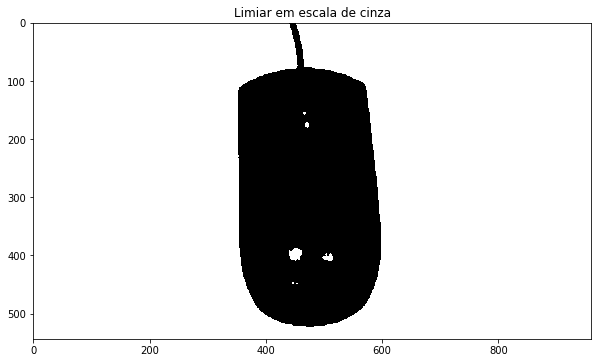

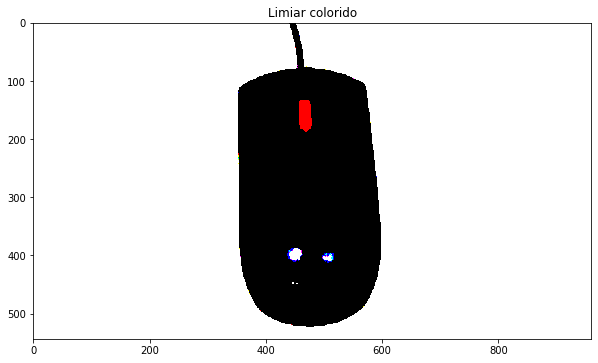

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
Exercício n.6
    Binarizacao de OTSU
    Abre uma foto e binariza pelo algoritmo de OTSU, utilizando a funcao do openCv cv2.THRESH_BINARY+cv2.THRESH_OTSU
    Para o colorido, os canais BGR foram separados em imagens independentes, binarizados e recombinados
"""

img = cv2.imread('fotos_ex/objeto.jpg')

#escala de cinza
img_c = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,th1 = cv2.threshold(img_c,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(th1, cmap='gray', vmin=0, vmax=255)
plt.title('Limiar em escala de cinza')
plt.show()

#colorida
img_b = img[:,:,0]
_,thb = cv2.threshold(img_b,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

img_g = img[:,:,1]
_,thg = cv2.threshold(img_g,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

img_r = img[:,:,2]
_,thr = cv2.threshold(img_r,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(largura,altura) = img_b.shape[:2]
img_th = np.zeros([largura,altura,3], dtype=np.uint8)
img_th[:,:,0]=thb
img_th[:,:,1]=thg
img_th[:,:,2]=thr
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_th,cv2.COLOR_BGR2RGB))
plt.title('Limiar colorido')
plt.show()

## Exercício 7

A utilização de blur para remoção de ruídos na imagem é um processo que pode ser eficiente, dependendo da intensidade de ruído. Também é importante destacar que em todos os casos a imagem original tem uma perca significativa de detalhes e nitidez. Nos resutados obtidos o Blur Gaussiano foi o que deteve melhor nitidez e recuperou a imagem original com menor ruído.

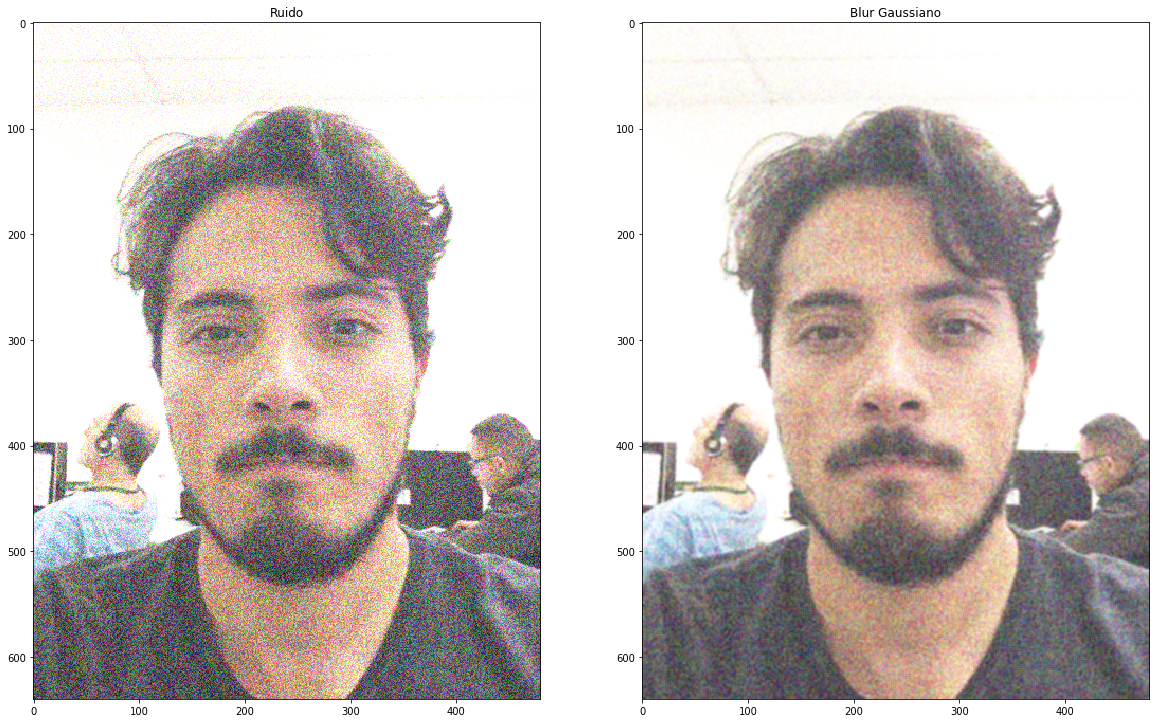

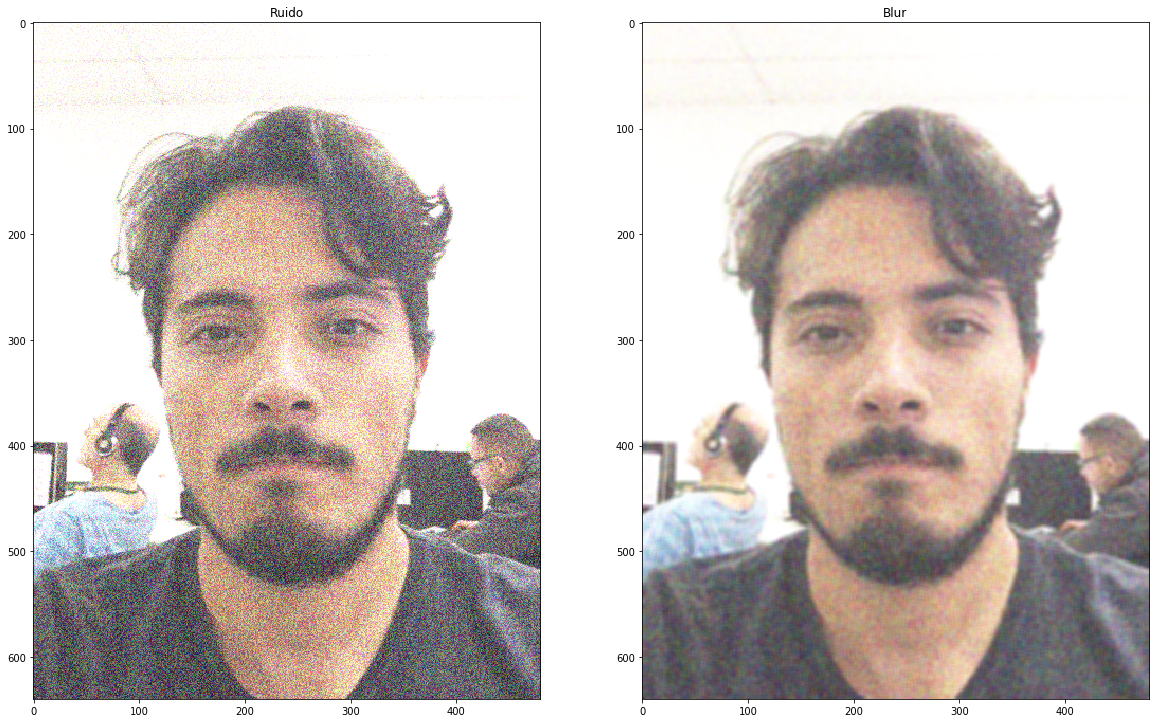

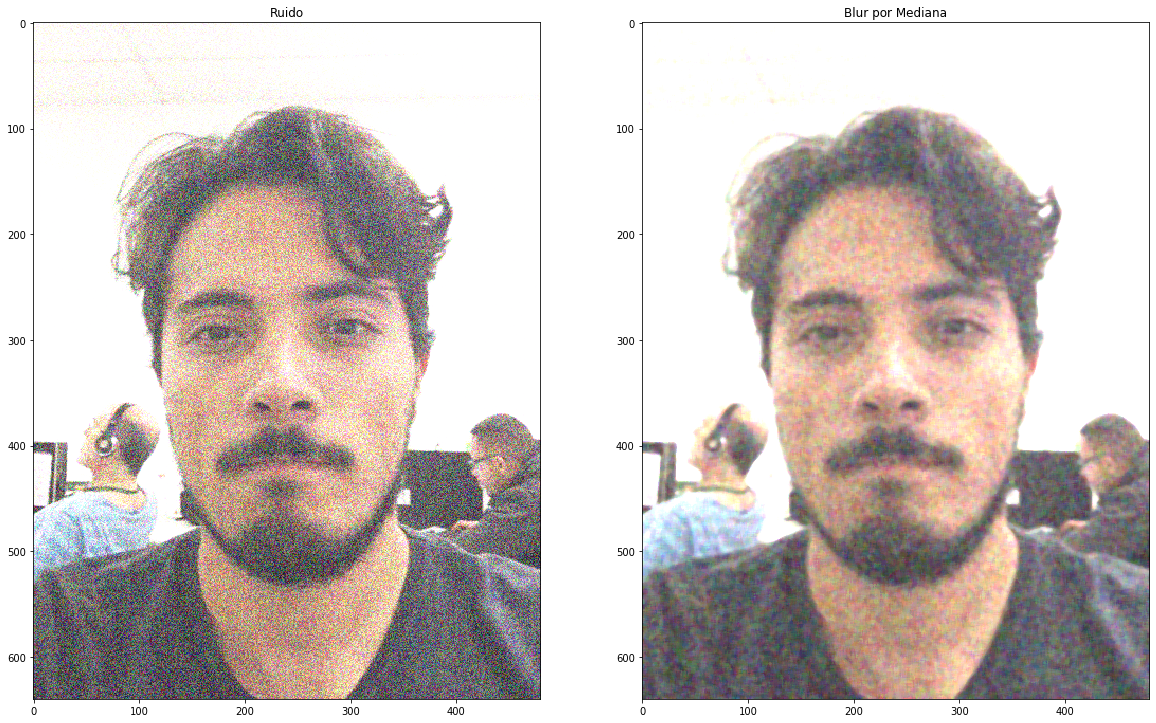

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

"""
INF209B − TÓPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
VISÃO COMPUTACIONAL

PRÁTICA 02

RA: 21201920754
NOME: RAFAEL COSTA FERNANDES
E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR

DESCRIÇÃO:
Exercício n.7
    Tecnicas de Filtragem
    Abre uma foto, adiciona ruido aleatorio, e Blur Gaussiano, blur, e um blur por media.
    Mostra as imagens, para poder comparar entre elas.
""" 


img = cv2.cvtColor(cv2.imread('fotos_ex/image1.jpeg'),cv2.COLOR_BGR2RGB)
ruido = np.uint8((1.5*img.std()*np.random.random(img.shape)))
img = cv2.add(img,ruido)

size=3

k_f = cv2.GaussianBlur(img,(size,size),10)

plt.figure(figsize=(20,20))
ax1=plt.subplot(121)
plt.imshow(img)
ax2=plt.subplot(122)
plt.imshow(k_f)



size=5

k_f = cv2.blur(img,(size,size))

plt.figure(figsize=(20,20))
ax3=plt.subplot(121)
plt.imshow(img)
ax4=plt.subplot(122)
plt.imshow(k_f)


size=5

k_f = cv2.medianBlur(img,size)

plt.figure(figsize=(20,20))
ax5=plt.subplot(121)
plt.imshow(img)
ax6=plt.subplot(122)
plt.imshow(k_f)


ax1.title.set_text('Ruido')
ax2.title.set_text('Blur Gaussiano')
ax3.title.set_text('Ruido')
ax4.title.set_text('Blur')
ax5.title.set_text('Ruido')
ax6.title.set_text('Blur por Mediana')
plt.show()

# Conclusões e Discussões

As ferramentas de manipulação de imagens aprendidas neste laboratório serão de fundamental importância em tarefas mais avançadas no decorrer do curso, visto que só após um tratamento adequado será possível recuperar as informações necessarias da imagem. Também fica claro que é possível realizar muitas tarefas sem a utilização da biblioteca OpenCV, mas que a sua capacidade de pararelismo de processos a torna muito útil em algoritmos mais complexos e que demandem maior poder computacional.